In [10]:
import pandas as pd

# Lista com os nomes dos arquivos
arquivos = [r"C:\Users\dudam\OneDrive\Área de Trabalho\AI Engineering\W6\D2\automated-customer-reviews\dataset_duda\data1.csv", r"C:\Users\dudam\OneDrive\Área de Trabalho\AI Engineering\W6\D2\automated-customer-reviews\dataset_duda\data2.csv", r"C:\Users\dudam\OneDrive\Área de Trabalho\AI Engineering\W6\D2\automated-customer-reviews\dataset_duda\data3.csv"]

# Lê e junta todos os CSVs
df = pd.concat([pd.read_csv(f) for f in arquivos])

# Remove linhas duplicadas
df = df.drop_duplicates()

# Salva o resultado em um novo arquivo
df.to_csv("data_uni.csv", index=False)

print("✅ Arquivos combinados e duplicadas removidas com sucesso!")


C:\Users\dudam\AppData\Local\Temp\ipykernel_5320\4156126413.py:7: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([pd.read_csv(f) for f in arquivos])


✅ Arquivos combinados e duplicadas removidas com sucesso!


In [11]:
# Load data
df = pd.read_csv("data_uni.csv")

# Basic shape
print("Rows, Columns:", df.shape)

# Peek at columns
print(df.columns)

# Quick preview
print(df.head(10))


Rows, Columns: (67897, 27)
Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'dateAdded', 'dateUpdated',
       'primaryCategories', 'imageURLs', 'manufacturerNumber', 'sourceURLs'],
      dtype='object')
                     id                                               name  \
0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi

C:\Users\dudam\AppData\Local\Temp\ipykernel_5320\3628718269.py:2: DtypeWarning: Columns (10,11,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_uni.csv")


In [12]:
# Define the columns
TEXT_COL = "reviews.text"
TITLE_COL = "reviews.title"
RATING_COL = "reviews.rating"

# Combine title + text into one column
df["full_review"] = (
    df[TITLE_COL].fillna('') + '. ' + df[TEXT_COL].fillna('')
)

# Keep only the relevant columns
df_sent = df[["full_review", RATING_COL]].copy()

print(df_sent.head(10))


                                         full_review  reviews.rating
0  Kindle. This product so far has not disappoint...             5.0
1  very fast. great for beginner or experienced p...             5.0
2  Beginner tablet for our 9 year old son.. Inexp...             5.0
3  Good!!!. I've had my Fire HD 8 two weeks now a...             4.0
4  Fantastic Tablet for kids. I bought this for m...             5.0
5  Just what we expected. This amazon fire 8 inch...             5.0
6  great e-reader tablet. Great for e-reading on ...             4.0
7  Great for gifts. I gave this as a Christmas gi...             5.0
8  Great for reading. Great as a device to read b...             5.0
9  Great and lightweight reader. I love ordering ...             5.0


In [14]:
print(df["reviews.rating"].value_counts(dropna=False))


reviews.rating
5.0    47084
4.0    15377
3.0     2898
1.0     1434
2.0     1071
NaN       33
Name: count, dtype: int64


In [15]:
# Map ratings to sentiment labels
def map_rating_to_label(r):
    if pd.isna(r):
        return None
    elif r <= 2:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

df_sent["label"] = df_sent[RATING_COL].apply(map_rating_to_label)

# Drop missing labels (NaNs)
df_sent = df_sent.dropna(subset=["label"])

# See how balanced it is
print(df_sent["label"].value_counts())
print(df_sent["label"].value_counts(normalize=True))


label
positive    62461
neutral      2898
negative     2505
Name: count, dtype: int64
label
positive    0.920385
neutral     0.042703
negative    0.036912
Name: proportion, dtype: float64


In [16]:
import re
import pandas as pd

def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()  # lowercase
    text = re.sub(r"<.*?>", " ", text)  # remove HTML tags
    text = re.sub(r"http\S+|www\S+", " ", text)  # remove URLs
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df_sent["clean_text"] = df_sent["full_review"].apply(clean_text)

# Drop empty texts
df_sent = df_sent[df_sent["clean_text"].str.len() > 0]

print(df_sent[["clean_text", "label"]].sample(5, random_state=42))


                                              clean_text     label
2928   not so good!. i had to return this product as ...  negative
36417  five stars. good amazonbasics product, cheap a...  positive
57287  tablet for my grandchild. my grandchild really...  positive
46280  these are fine, for the price but not as durac...  positive
21127  first kindle. exceeded my expectation. easy to...  positive


In [17]:
import matplotlib.pyplot as plt

# Basic count of labels
label_counts = df_sent["label"].value_counts()
label_percent = df_sent["label"].value_counts(normalize=True) * 100

print("Counts:")
print(label_counts)
print("\nPercentages:")
print(label_percent.round(2))


Counts:
label
positive    62461
neutral      2898
negative     2505
Name: count, dtype: int64

Percentages:
label
positive    92.04
neutral      4.27
negative     3.69
Name: proportion, dtype: float64


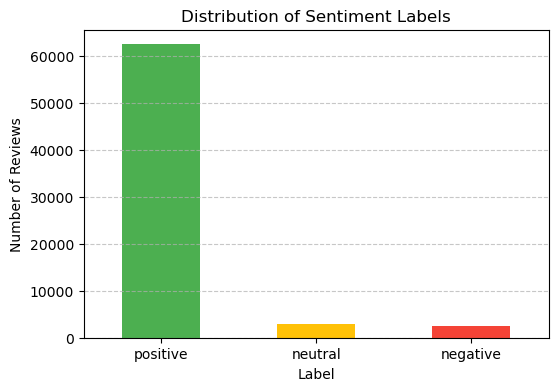

In [18]:
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df_sent["clean_text"]
y = df_sent["label"]

# Split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ensures same label proportions
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("\nTrain label distribution:")
print(y_train.value_counts(normalize=True).round(3))
print("\nTest label distribution:")
print(y_test.value_counts(normalize=True).round(3))


Train size: 54291
Test size: 13573

Train label distribution:
label
positive    0.920
neutral     0.043
negative    0.037
Name: proportion, dtype: float64

Test label distribution:
label
positive    0.920
neutral     0.043
negative    0.037
Name: proportion, dtype: float64


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # limit vocabulary size for speed
    ngram_range=(1,2),      # include unigrams + bigrams
    stop_words='english'    # remove common English stopwords
)

# Fit on training data and transform both sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF matrix shapes:")
print("Train:", X_train_tfidf.shape)
print("Test:", X_test_tfidf.shape)


TF-IDF matrix shapes:
Train: (54291, 5000)
Test: (13573, 5000)


In [21]:
from sklearn.linear_model import LogisticRegression

# Create and train model
model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

              precision    recall  f1-score   support

    negative      0.504     0.800     0.619       501
     neutral      0.248     0.688     0.364       580
    positive      0.988     0.883     0.932     12492

    accuracy                          0.872     13573
   macro avg      0.580     0.790     0.638     13573
weighted avg      0.938     0.872     0.897     13573



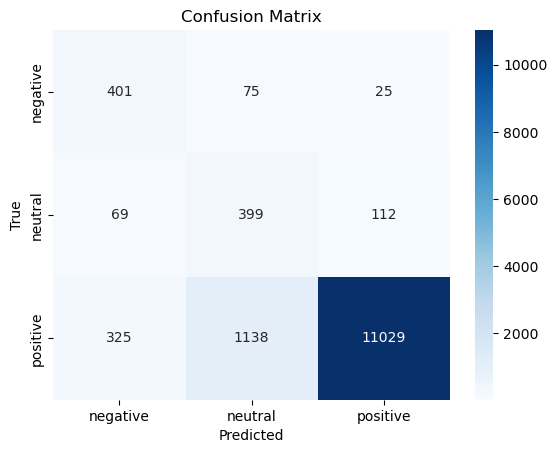

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test data
y_pred = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, y_pred, digits=3))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["negative", "neutral", "positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [23]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:
from imblearn.over_sampling import RandomOverSampler

# Initialize oversampler
ros = RandomOverSampler(random_state=42)

# Apply it to the TRAINING set only (never test!)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)

print("Before oversampling:", y_train.value_counts())
print("\nAfter oversampling:", y_train_resampled.value_counts())


Before oversampling: label
positive    49969
neutral      2318
negative     2004
Name: count, dtype: int64

After oversampling: label
positive    49969
neutral     49969
negative    49969
Name: count, dtype: int64


In [28]:
model_balanced = LogisticRegression(max_iter=10000, random_state=42)
model_balanced.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=10000, random_state=42)

              precision    recall  f1-score   support

    negative      0.521     0.798     0.630       501
     neutral      0.269     0.678     0.385       580
    positive      0.987     0.896     0.939     12492

    accuracy                          0.883     13573
   macro avg      0.592     0.791     0.652     13573
weighted avg      0.939     0.883     0.904     13573



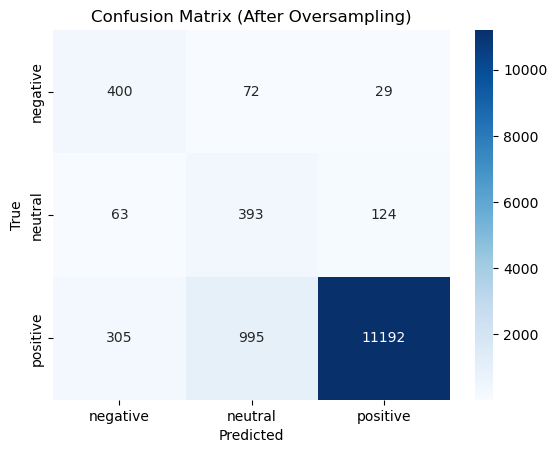

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_balanced = model_balanced.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_balanced, digits=3))

cm = confusion_matrix(y_test, y_pred_balanced, labels=["negative", "neutral", "positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (After Oversampling)")
plt.show()


              precision    recall  f1-score   support

    negative      0.555     0.770     0.645       501
     neutral      0.278     0.629     0.386       580
    positive      0.983     0.910     0.945     12492

    accuracy                          0.893     13573
   macro avg      0.605     0.770     0.659     13573
weighted avg      0.937     0.893     0.910     13573



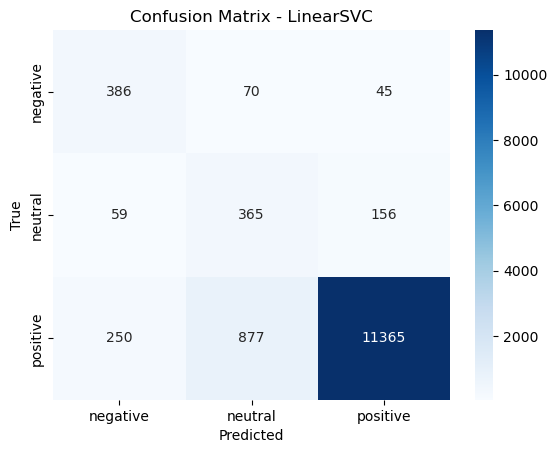

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train LinearSVC model
svm_model = LinearSVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred_svm, digits=3))

cm = confusion_matrix(y_test, y_pred_svm, labels=["negative", "neutral", "positive"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LinearSVC")
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_tuned = TfidfVectorizer(
    max_features=20000,       # capture more vocabulary
    ngram_range=(1,3),        # include unigrams, bigrams, trigrams
    min_df=2,                 # ignore words that appear only once
    stop_words='english'
)

X_train_tfidf_tuned = tfidf_tuned.fit_transform(X_train)
X_test_tfidf_tuned = tfidf_tuned.transform(X_test)

print("Train matrix:", X_train_tfidf_tuned.shape)
print("Test matrix:", X_test_tfidf_tuned.shape)


Train matrix: (54291, 20000)
Test matrix: (13573, 20000)


In [35]:
from sklearn.svm import LinearSVC

svm_tuned = LinearSVC(class_weight='balanced', C=0.5, random_state=42)
svm_tuned.fit(X_train_tfidf, y_train)


LinearSVC(C=0.5, class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

    negative      0.738     0.758     0.748       501
     neutral      0.581     0.559     0.569       580
    positive      0.978     0.979     0.978     12492

    accuracy                          0.952     13573
   macro avg      0.765     0.765     0.765     13573
weighted avg      0.952     0.952     0.952     13573



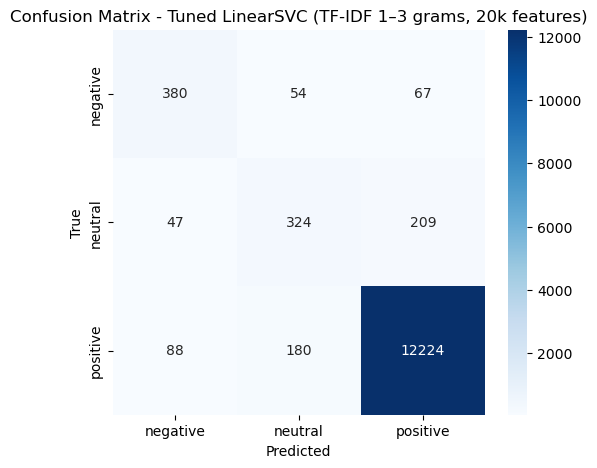

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_tuned = svm_tuned.predict(X_test_tfidf_tuned)

# Print performance metrics
print(classification_report(y_test, y_pred_tuned, digits=3))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned,
                      labels=["negative", "neutral", "positive"])

# Plot it
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["negative", "neutral", "positive"],
            yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Tuned LinearSVC (TF-IDF 1–3 grams, 20k features)")
plt.show()
